In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from PIL import Image

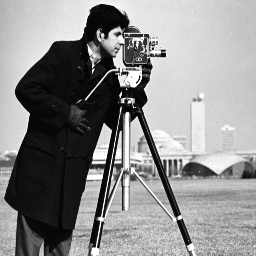

In [ ]:
img = Image.open('./camman.tif')
img

In [ ]:
img = img.convert('L')

img = np.array(img)

img.shape


(256, 256)

**Explication :**

-La méthode `convert` est utilisée pour transformer une image en niveaux de  
 gris (mode 'L' signifie "Luminance"). Cela simplifie l'image en supprimant les informations de couleur.

-Ici, l'image est convertie en un `tableau NumPy`.
 Cela permet de manipuler l'image comme une matrice de valeurs numériques,
 où chaque valeur représente une intensité de pixel en niveaux de gris.

-Ensuite, on affiche les dimensions de l'image sous forme de tuple.
 Par exemple, (256, 256) indique que l'image a une résolution de 256x256 pixels.

In [ ]:

noise = np.random.normal(0,25, size=img.shape)



Cette ligne génère un bruit aléatoire selon une distribution normale (`gaussienne`)
avec une moyenne de 0 et un écart-type de 25. La taille du bruit (`size`)
correspond à la taille de l'image (`img.shape`), de sorte que le bruit puisse être ajouté pixel par pixel.


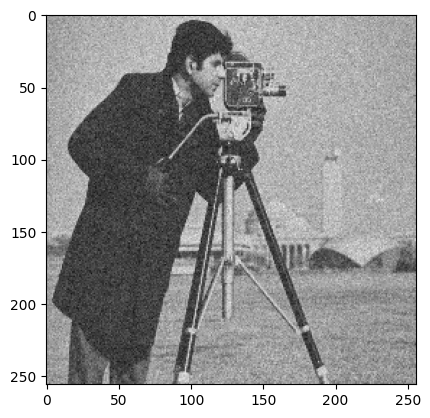

In [ ]:

plt.imshow(img+noise, cmap='gray')

 après on affiche l'image avec le bruit ajouté (`img + noise)`.
 Le paramètre `cmap='gray'` est utilisé pour afficher l'image en niveaux de gris.

# Filtrage spatial linéaire

In [ ]:
def gauss_bruit(img, m, sd):
    noise = np.random.normal(loc=m, scale=sd, size=img.shape).astype(np.uint8)
    img_n = img + noise
    return np.clip(img_n, 0, 255)

**Explications :**

**Objectif :** Cette fonction ajoute du bruit gaussien à une image et retourne une version bruitée.

**Détails :**
`loc=m `: La moyenne de la distribution normale utilisée pour générer le bruit.

`scale=sd `: L'écart-type de la distribution, qui contrôle l'intensité du bruit.

`size=img.shape` : Le bruit généré aura la même taille que l'image.

`.astype(np.uint8)` : Les valeurs du bruit sont converties en entier non signé 8 bits (valeurs entre 0 et 255), pour être compatibles avec les pixels de l'image.

`img_n = img + noise `: On ajoute le bruit à l'image originale, pixel par pixel.

`np.clip(img_n, 0, 255)` : Cette fonction s'assure que les valeurs des pixels restent dans l'intervalle [0, 255], évitant les débordements.

In [ ]:
def display_images(img1,img2, t1='Original', t2='After', figsize=(12,10)):
    fig, axes = plt.subplots(1,2, figsize=figsize)

    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(t1)

    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(t2)

    for ax in axes:
        ax.axis('off')

    plt.show()

**Explications :**

**Objectif :** Cette fonction permet d'afficher deux images côte à côte pour les comparer.

**Détails :**

`plt.subplots(1, 2, figsize=figsize) `: Crée une figure avec 2 sous-graphiques (1 ligne, 2 colonnes). La taille de la figure est définie par figsize.

`axes[0].imshow(img1, cmap='gray') `: Affiche la première image (img1) en niveaux de gris.

`axes[1].imshow(img2, cmap='gray')` : Affiche la deuxième image (img2) en niveaux de gris.

`set_title(t1/t2) `: Ajoute un titre à chaque image pour les distinguer (par défaut, "Original" et "After").

`ax.axis('off')` : Désactive les axes pour rendre l'affichage plus propre.

`plt.show()` : Affiche les images à l'écran.

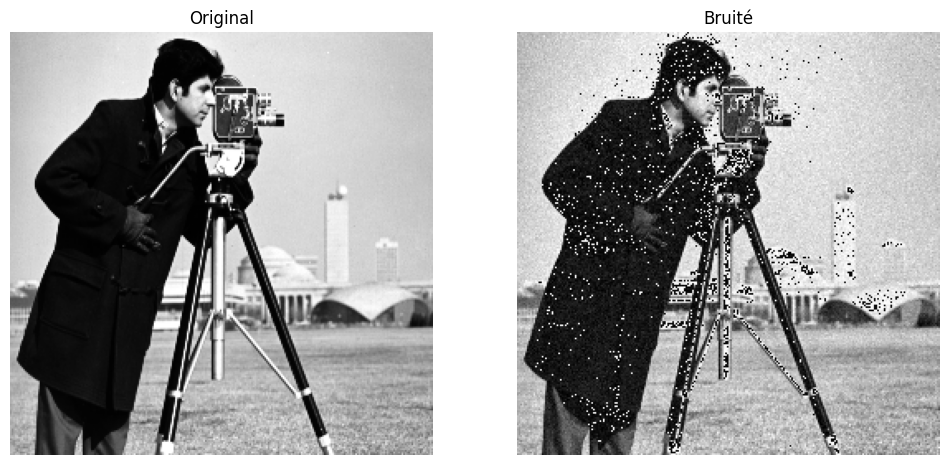

In [ ]:
img_b = gauss_bruit(img, 5, 10) # 5 10
display_images(img, img_b,t2='Bruité', figsize=(12,8))

**Explications :**

**Objectif :** Ajouter du bruit gaussien à une image (img) et afficher l'image originale et bruitée côte à côte.

**Détails :**

`gauss_bruit(img, 5, 10)` :
Ajoute un bruit gaussien à l'image avec une moyenne de 5 et un écart-type de 10.

`display_images(img, img_b, t2='Bruitée', figsize=(12,8))` :
Affiche l'image originale et la version bruitée côte à côte.



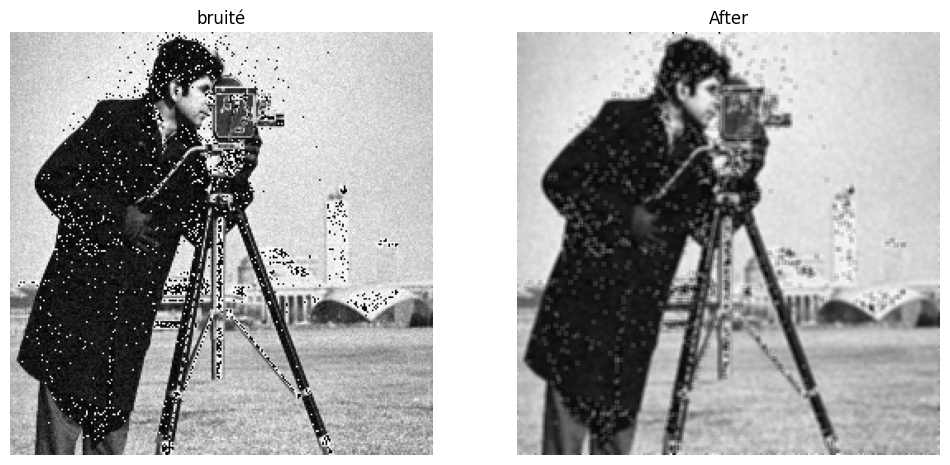

In [ ]:
# filtre_Moy(image) permettant de réaliser lissage par moyennag dans un voisinage 3x3
def filtre_Moy(image):
    m,n = image.shape
    n_img = np.copy(image)
    for i in range(1, m-1):
        for j in range(1, n-1):
            n_img[i,j] = np.sum(image[i-1:i+2,j-1:j+2]) / 9

    return n_img
img_n = filtre_Moy(img_b)
display_images(img_b, img_n, t1='bruité')

**Explications :**

**Objectif :** Appliquer un filtre de lissage par moyennage sur une image bruitée (img_b) pour réduire le bruit en remplaçant chaque pixel par la moyenne des pixels dans son voisinage 3x3.

**Détails :**

`filtre_Moy(image)` :

Réalise un lissage par moyennage dans un voisinage 3x3.

Chaque pixel est remplacé par la moyenne des pixels de son voisinage.

Le filtrage ne s'applique pas sur les bords de l'image pour éviter les débordements.

**Étapes principales :**

`m, n = image.shape` : Récupère les dimensions de l'image (nombre de lignes et colonnes).

`n_img = np.copy(image)` : Crée une copie de l'image pour ne pas modifier l'originale.

`Boucles for i in range(1, m-1) et for j in range(1, n-1)` :
Parcourt les pixels internes de l'image, en excluant les bords.

`np.sum(image[i-1:i+2, j-1:j+2]) / 9 `:
Calcule la somme des valeurs des pixels dans un voisinage 3x3 centré sur le pixel (i, j), puis divise par 9 pour obtenir la moyenne.

`return n_img` : Retourne l'image lissée.

**Application :**

`img_n = filtre_Moy(img_b)` : Applique le filtre de lissage à l'image bruitée (img_b) pour produire une nouvelle image (img_n) avec un bruit réduit.

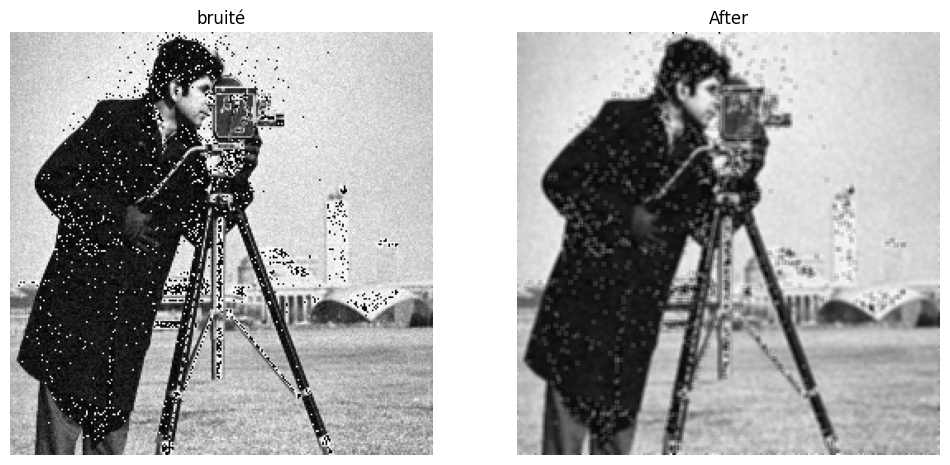

In [ ]:
# pour un voisinage de n*m
def filtre_Moy(image,m=3, n=3):
    n_img = np.copy(image)

    x = m//2
    y = n//2

    for i in range(x, image.shape[0]-x):
        for j in range(y, image.shape[1]-y):
            n_img[i,j] = np.sum(image[i-x:i+x+1,j-y:j+y+1]) / (m*n)

    return n_img
img_n = filtre_Moy(img_b, 3,3)
display_images(img_b, img_n, t1='bruité')

**Explications :**

**Objectif :**
 Appliquer un filtre de lissage par moyennage sur une image en utilisant un voisinage de taille personnalisée m×n.
 Ce filtre permet de réduire le bruit dans l'image en remplaçant chaque pixel par la moyenne des pixels dans un voisinage rectangulaire défini par m et n.

**Détails :**

1.Définition de la fonction `filtre_Moy(image, m=3, n=3)` :

-Réalise un lissage par moyennage sur un voisinage de taille m×n.

-Par défaut, m=3 et n=3 (voisinage de 3x3).

-Chaque pixel est remplacé par la moyenne des pixels dans son voisinage.

**Étapes principales :**

`n_img = np.copy(image) `: Crée une copie de l'image pour stocker les nouvelles valeurs sans modifier l'image originale.

`x = m // 2, y = n // 2` : Définit la moitié des dimensions du voisinage. Cela permet de centrer le voisinage sur chaque pixel.

`Boucles for i in range(x, image.shape[0]-x) et for j in range(y, image.shape[1]-y)` :
Parcourt chaque pixel interne de l'image, en évitant les bords qui ne disposent pas d'un voisinage complet de m×n.

`np.sum(image[i-x:i+x+1, j-y:j+y+1]) / (m * n) `:
Calcule la somme des pixels dans le voisinage m×n centré sur le pixel (i, j).
Divise cette somme par m×n pour obtenir la moyenne.

`return n_img `: Retourne l'image lissée.

**Application :**

`img_n = filtre_Moy(img_b, 3, 3) `:
Applique le filtre de lissage à l'image bruitée img_b en utilisant un voisinage de 3x3 pixels.
Le résultat est une image lissée img_n, où le bruit a été réduit.

**Affichage :**

`display_images(img_b, img_n, t1='bruité')\` :
Affiche l'image bruitée et l'image lissée côte à côte.
Le titre de l'image bruitée est défini comme "bruité".


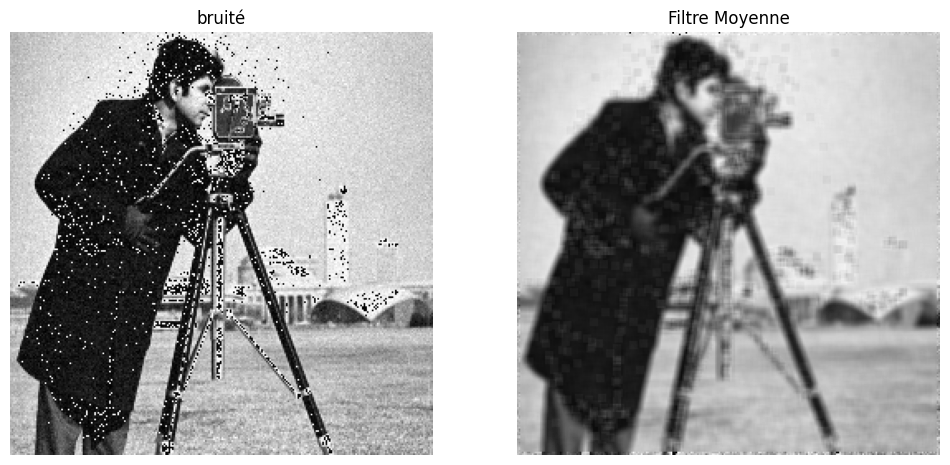

In [ ]:
img_n = filtre_Moy(img_b, 5, 5)
display_images(img_b, img_n, t1='bruité',t2='Filtre Moyenne')

Appliquer un filtre de lissage par moyennage sur un voisinage de 5x5 pixels pour réduire le bruit dans l'image bruitée `img_b`

In [ ]:
#filtre_PBas
def filter_PBas(image, H):
    n_image = np.zeros_like(image, dtype=np.float32)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            n_image[i,j] = np.sum(image[i-1:i+2,j-1:j+2] * H)

    return np.clip(n_image, 0,255).astype(np.uint8)

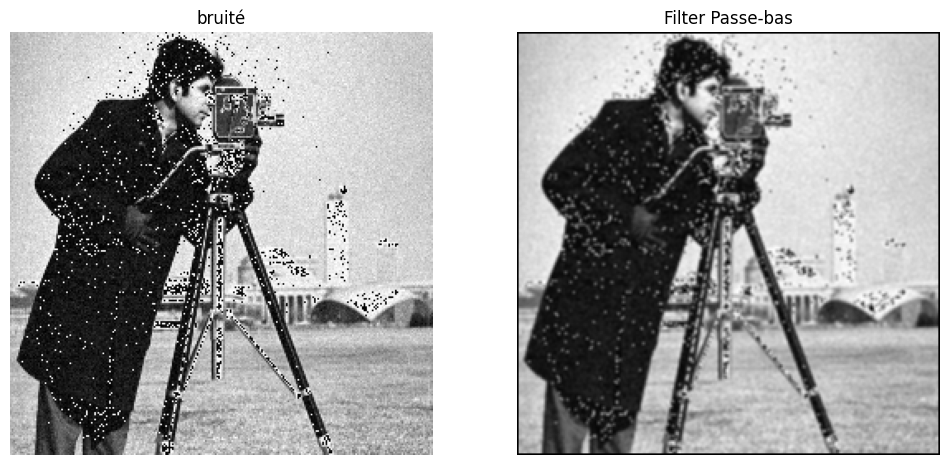

In [ ]:
H = (1/16) * np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

img_n = filter_PBas(img_b, H)
display_images(img_b, img_n, t1='bruité', t2='Filter Passe-bas')

**Explication :**

**Objectif :** Appliquer un filtre passe-bas sur une image bruitée (`img_b`) pour réduire le bruit en utilisant une convolution avec un noyau (ou matrice de filtre) ***H***.

**Détails :**

1.`filter_PBas(image, H)` :

-Applique un filtre passe-bas en effectuant une convolution entre l'image
 d'entrée et un noyau ***H***.
-Le filtre passe-bas lisse l'image en atténuant les hautes fréquences (bruit)  
 et en conservant les basses fréquences (informations importantes).

**Étapes principales :**

`n_image = np.zeros_like(image, dtype=np.float32)` : Crée une nouvelle image vide pour stocker les résultats de la convolution.

`Boucles for i in range(1, image.shape[0] - 1) et for j in range(1, image.shape[1] - 1) `:
Parcourt chaque pixel interne de l'image, en évitant les bords.

`np.sum(image[i-1:i+2, j-1:j+2] * H)` :
Multiplie le voisinage 3×3 autour du pixel (i, j) par le noyau
***H***, puis calcule la somme des valeurs pour appliquer la convolution.

`np.clip(n_image, 0, 255).astype(np.uint8)` :
Limite les valeurs des pixels entre 0 et 255 et convertit le résultat en type entier non signé pour obtenir une image valide.

2.***H*** (Noyau du filtre passe-bas) :

H est une matrice de 3×3 représentant un filtre gaussien normalisé (valeurs divisées par 16).
Cette matrice donne plus de poids au pixel central et à ses voisins immédiats pour créer un effet de lissage :

H = \frac{1}{16} \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}


**Application :**

`img_n = filter_PBas(img_b, H)` :
Applique le filtre passe-bas défini par ***H*** sur l'image bruitée `img_b` pour produire une nouvelle image filtrée `img_n`.

**Affichage :**

`display_images(img_b, img_n, t1='bruité', t2='Filter Passe-bas')\` :
Affiche l'image bruitée (img_b) à gauche avec le titre "bruité".
Affiche l'image filtrée (img_n) à droite avec le titre "Filter Passe-bas".

In [ ]:
#filtre passe-haut
def filter_PHaut(image, H):
    #n_image = np.copy(image)

    n_image = np.zeros_like(img, dtype=np.float32)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):

            p = image[i-1:i+2,j-1:j+2] * H
            n_image[i,j] = np.sum(p)

    return np.clip(n_image, 0, 255).astype(np.uint8)

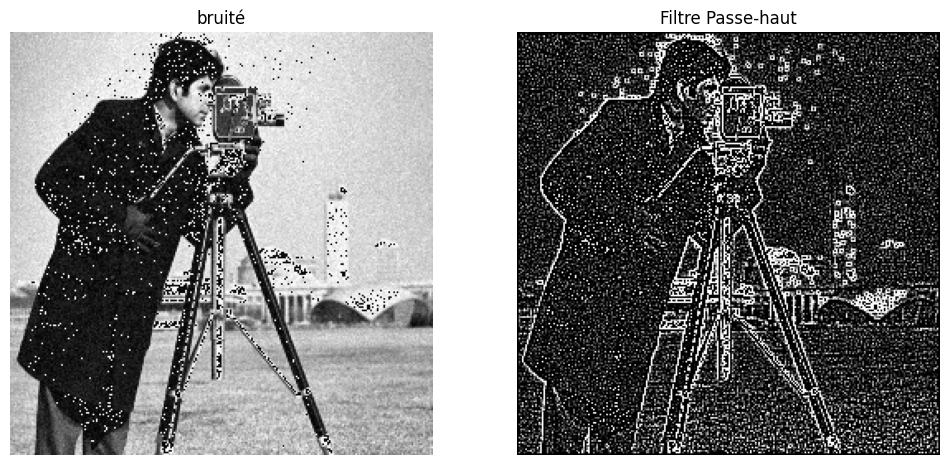

In [ ]:
H = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

img_n = filter_PHaut(img_b, H)

#img_n = cv2.filter2D(img, -1, H)
display_images(img_b, img_n, t1='bruité', t2='Filtre Passe-haut')

**Explication :**  

**Objectif :**

Appliquer un filtre passe-haut sur une image bruitée (`img_b`) pour accentuer les contours et les détails fins. Ce filtre met en évidence les hautes fréquences (variations rapides comme les bords et les détails) tout en atténuant les basses fréquences (zones uniformes).


1. `Fonction filter_PHaut(image, H)` :

 Cette fonction applique une convolution entre l'image d'entrée et un noyau
 ***H***, correspondant à un filtre passe-haut.

  - `n_image = np.zeros_like(image, dtype=np.float32) `:

    Initialise une image vide avec les mêmes dimensions que l'image d'entrée, mais avec des valeurs en virgule flottante pour plus de précision dans les calculs.

  - Double boucle `for` :

    -Parcourt chaque pixel interne de l'image (les pixels des bords ne sont pas
    traités pour éviter les débordements).

    -`p = image[i-1:i+2, j-1:j+2] * H` :
    Extrait un voisinage 3×3 autour du pixel courant (i, j).
    Multiplie chaque pixel de ce voisinage par l'élément correspondant du noyau H (opération de convolution).

    -`n_image[i, j] = np.sum(p)` :
    Calcule la somme des produits pour obtenir la valeur du pixel filtré.

  - `np.clip(n_image, 0, 255).astype(np.uint8) `:

    -Limite les valeurs des pixels entre 0 et 255 pour éviter les dépassements.

    -Convertit les valeurs en entiers non signés (type approprié pour une image).

2. `Noyau H (Filtre Passe-haut)` :

 Le noyau ***H***  utilisé ici est un filtre de détection des contours (Laplacien), défini par la matrice suivante :

 H = \begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8  & -1 \\
-1 & -1 & -1
\end{bmatrix}

  `-Description :`

    -La valeur centrale 8 donne un poids important au pixel courant.

    -Les valeurs négatives autour (-1) soustraient les contributions des pixels
    voisins.

    -Cela met en évidence les différences locales (les contours ou variations
    brusques), tout en supprimant les zones uniformes.
   
3. `Application `:

 -`img_n = filter_PHaut(img_b, H)` :

      -Applique le filtre passe-haut H à l'image bruitée img_b pour produire  
       une image filtrée img_n.

      -L'image résultante met en évidence les contours présents dans l'image   d'origine.
  
4. `Affichage des résultats` :

  - `display_images(img_b, img_n, t1='bruité', t2='Filtre Passe-haut')` :

      -Affiche l'image bruitée (img_b) à gauche avec le titre "bruité".

      -Affiche l'image filtrée (img_n) à droite avec le titre "Filtre      
       Passe-haut".

**`Effet du Filtre Passe-haut` :**

  -Le filtre passe-haut est utilisé pour accentuer les détails dans une image, en mettant en évidence les contours et les transitions rapides d'intensité (comme les bords).

  -L'image résultante peut être utilisée pour des tâches telles que la détection de contours ou pour améliorer les zones détaillées dans une image.



#II. 	Filtrage spatial non linéaire

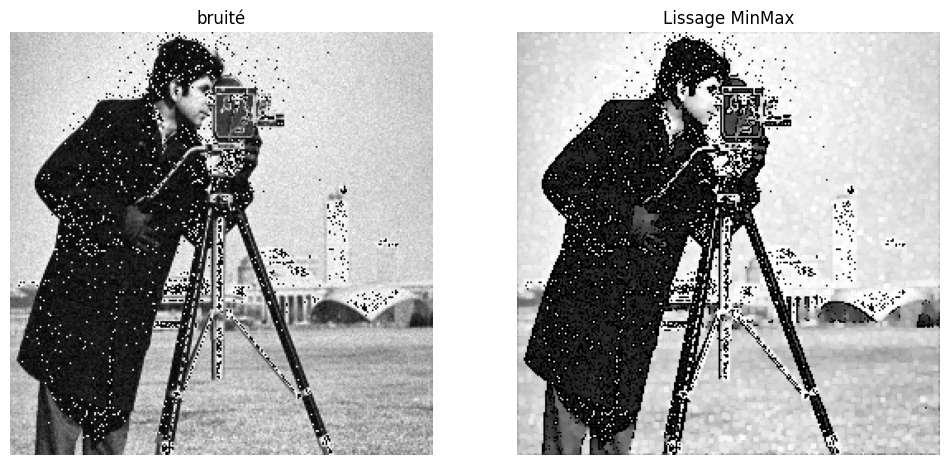

In [ ]:
#lissage_MinMax
def lissage_MinMax(image):
    n_img = np.copy(image)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            m = np.min(image[i-1:i+2])
            M = np.max(image[i-1:i+2, j-1:j+2])
            x = image[i,j]

            n_img[i,j] = m if x < (M-m) / 2 else M
    return n_img


img_n = lissage_MinMax(img_b)
display_images(img_b, img_n, t1='bruité', t2='Lissage MinMax')

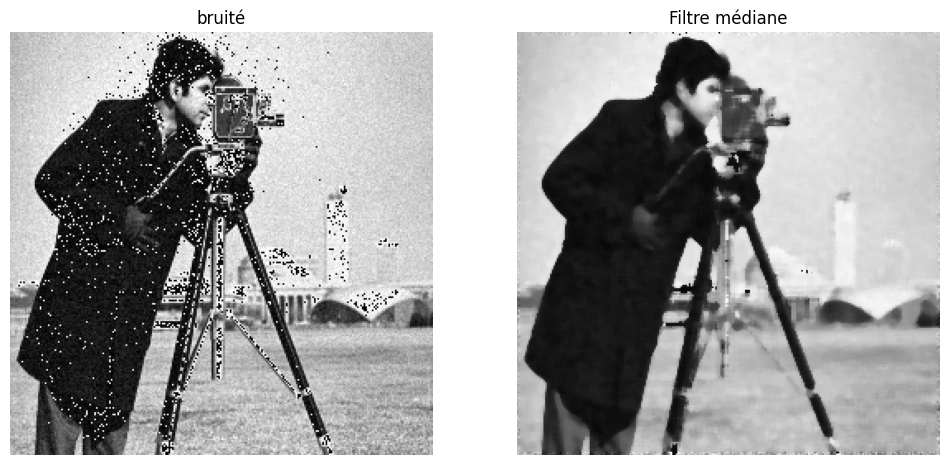

In [ ]:
#filtrage médian
def filtrage_Median(image):
    img_n = np.copy(image)

    for i in range(2, image.shape[0]-2):
        for j in range(2, image.shape[1]-2):
            img_n[i,j] = np.median(image[i-2:i+3, j-2:j+3])
    return img_n

img_n = filtrage_Median(img_b)
display_images(img_b, img_n, t1='bruité', t2='Filtre médiane')

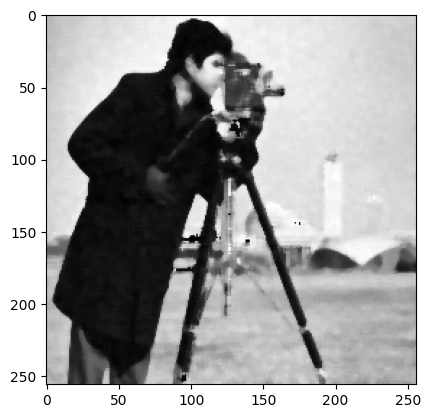

In [ ]:
plt.imshow(cv2.medianBlur(img_b, 5), cmap='gray')